<a href="https://colab.research.google.com/github/AndrewSmith44/MAT421/blob/main/Module_H2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Numerical Error and Instability

1.1 Understanding Numerical Error and Instability

Numerical methods approximate mathematical operations, but they introduce errors due to finite precision and discretization. The main types of numerical errors include:

Round-off error: Caused by limited floating-point precision in computers.

Truncation error: Occurs when an infinite process (e.g., Taylor series) is approximated by a finite sum.

Discretization error: Results from approximating a continuous function with a discrete set of points.

Instability arises when numerical errors grow uncontrollably during computations. A method is stable if small errors do not significantly affect the final solution. Instability often occurs in iterative methods when small errors amplify rather than dissipate.

Example: Round-off Error in Floating-Point Arithmetic

Floating-point representation cannot store all real numbers exactly, leading to small discrepancies. For example, adding small numbers to large numbers may result in loss of precision.

In [1]:
import numpy as np


a = 1.0
b = 1e-16
c = a + b
print("a + b =", c)
print("Is a + b equal to a?", np.isclose(a, c))


a + b = 1.0
Is a + b equal to a? True


Example: Instability in Recursive Computation

Some recursive formulas introduce instability due to error accumulation. Consider the following recurrence relation:

$$
f_n = 2f_{n-1} - f_{n-2}
$$

If initial values are slightly perturbed, the error propagates exponentially.

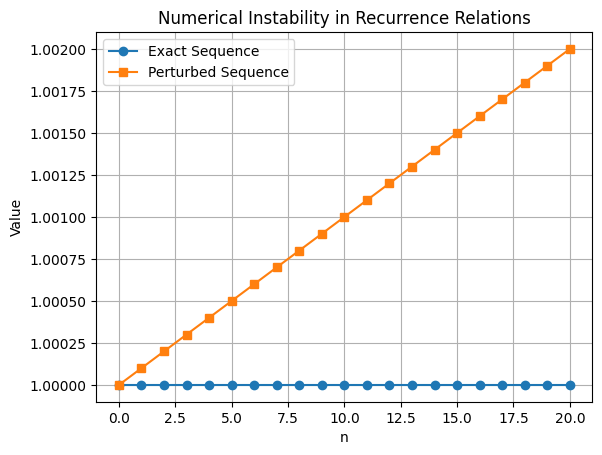

In [2]:
import matplotlib.pyplot as plt

def unstable_recurrence(n, f0, f1):
    f = [f0, f1]
    for _ in range(n-1):
        f.append(2*f[-1] - f[-2])
    return f

n_steps = 20
exact = unstable_recurrence(n_steps, 1.0, 1.0)
perturbed = unstable_recurrence(n_steps, 1.0, 1.0001)

plt.plot(exact, label="Exact Sequence", marker='o')
plt.plot(perturbed, label="Perturbed Sequence", marker='s')
plt.xlabel("n")
plt.ylabel("Value")
plt.title("Numerical Instability in Recurrence Relations")
plt.legend()
plt.grid()
plt.show()


2. Predictor-Corrector Methods

2.1 Understanding Predictor-Corrector Methods

Predictor-Corrector methods are used to numerically solve ordinary differential equations (ODEs). They consist of two steps:

Predictor Step: Estimate
𝑦
𝑛
+
1
using an explicit method (e.g., Euler’s method).

Corrector Step: Refine
𝑦
𝑛
+
1
  using an implicit method (e.g., trapezoidal rule).

A common Predictor-Corrector pair is Euler's method (predictor) and Trapezoidal rule (corrector):

Predictor:
$$
y_{n+1}^P = y_n + h f(x_n, y_n)
$$

Corrector: $$y_{n+1} = y_n + \frac{h}{2} \left[f(x_n, y_n) + f(x_{n+1}, y_{n+1}^P) \right]$$

This method balances the efficiency of explicit methods with the accuracy of implicit methods.

2.2 Implementing a Predictor-Corrector Method

We solve the ODE:

$$
\frac{dy}{dx} = -2y + x
$$

using the Euler-Trapezoidal predictor-corrector method.

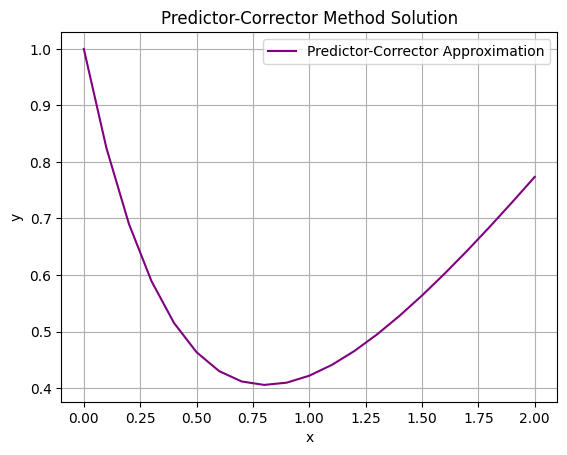

In [3]:
def predictor_corrector(f, y0, x0, xn, h):
    steps = int((xn - x0) / h)
    x_values = np.linspace(x0, xn, steps + 1)
    y_values = np.zeros(steps + 1)
    y_values[0] = y0

    for n in range(steps):
        yp = y_values[n] + h * f(x_values[n], y_values[n])

        y_values[n + 1] = y_values[n] + (h / 2) * (f(x_values[n], y_values[n]) + f(x_values[n+1], yp))

    return x_values, y_values

def f(x, y):
    return -2*y + x

x0, xn, y0, h = 0, 2, 1, 0.1
x_values, y_values = predictor_corrector(f, y0, x0, xn, h)

plt.plot(x_values, y_values, label="Predictor-Corrector Approximation", color="purple")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictor-Corrector Method Solution")
plt.legend()
plt.grid()
plt.show()
